# Orders - Multivariate Regression of  the `review_score`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)
orders.head()

/Users/victorvoneisenhart-rothe/code/Victorvone/data-context-and-setup/olist/order.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distances['distance_seller_customer'] = distances\


,order_id,order_status,wait_time,expected_wait_time,delay_vs_expected,review_score,dim_is_five_star,dim_is_one_star,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,8.436574,15.544063,0.0,4,0,0,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,13.782037,19.137766,0.0,4,0,0,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,9.394213,26.639711,0.0,5,1,0,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,13.208750,26.188819,0.0,5,1,0,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2.873877,12.112049,0.0,5,1,0,1,1,19.90,8.72,30.174037


## 1 - Univariate regression

In [5]:
import statsmodels.formula.api as smf

model1 = smf.ols(formula='review_score ~ wait_time', data=orders).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:32:41   Log-Likelihood:            -1.5441e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7236      0.006    727.904      0.000       4.711       4.736
wait_time     -0.0454      0.000   -109.730      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19552.934   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35454.407
Skew:                          -1.300   Prob(JB):                         0.00
Kurtosis:                       4.453   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Model 2***:

In [6]:
model2 = smf.ols(formula='review_score ~ delay_vs_expected', data=orders).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:32:41   Log-Likelihood:            -1.5639e+05
No. Observations:               95872   AIC:                         3.128e+05
Df Residuals:                   95870   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2121      0.004   1041.192      0.000       4.204       4.220
delay_vs_expected    -0.0752      0.001    -87.644      0.000      -0.077      -0.073
==============================================================================
Omnibus:                    20662.535   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49770.507
Skew:                          -1.203   Prob(JB):                         0.00
Kurtosis:                       5.582   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 - Multivariate regression

In [7]:
model3 = smf.ols(formula='review_score ~ wait_time + delay_vs_expected', data=orders).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6191.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:32:42   Log-Likelihood:            -1.5426e+05
No. Observations:               95872   AIC:                         3.085e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6502      0.008    601.568      0.000       4.635       4.665
wait_time            -0.0383      0.001    -65.969      0.000      -0.039      -0.037
delay_vs_expected    -0.0205      0.001    -17.417      0.000      -0.023      -0.018
==============================================================================
Omnibus:                    19995.754   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40513.333
Skew:                          -1.249   Prob(JB):                         0.00
Kurtosis:                       4.976   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

wait_time has a stronger effect on review_score than delay vs expected

In [8]:
orders.keys()

Index(['order_id', 'order_status', 'wait_time', 'expected_wait_time',
       'delay_vs_expected', 'review_score', 'dim_is_five_star',
       'dim_is_one_star', 'number_of_products', 'number_of_sellers', 'price',
       'freight_value', 'distance_seller_customer'],
      dtype='object')

In [9]:
#standardize features
from scipy import stats
orders_standard = orders
orders_standard[['wait_time', 'delay_vs_expected', 'number_of_products','number_of_sellers', 'price', 'freight_value', 'distance_seller_customer']] = stats.zscore(orders_standard[['wait_time', 'delay_vs_expected', 'number_of_products','number_of_sellers', 'price', 'freight_value', 'distance_seller_customer']])

In [10]:
model4 = smf.ols(formula='review_score ~ wait_time + delay_vs_expected + number_of_products + number_of_sellers  + price + freight_value + distance_seller_customer', data=orders_standard).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     2502.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:32:42   Log-Likelihood:            -1.5311e+05
No. Observations:               95872   AIC:                         3.062e+05
Df Residuals:                   95865   BIC:                         3.063e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.1555      0.004   1076.730      0.000       4.148       4.163
wait_time                   -0.4309      0.006    -68.982      0.000      -0.443      -0.419
delay_vs_expected           -0.0558      0.006     -9.716      0.000      -0.067      -0.045
number_of_products          -0.0833      0.002    -38.094      0.000      -0.088      -0.079
number_of_sellers           -0.0833      0.002    -38.094      0.000      -0.088      -0.079
price                       -0.0022      0.004     -0.515      0.606      -0.011       0.006
freight_value                0.0019      0.005      0.387      0.699      -0.008       0.012
distance_seller_customer     0.0946      0.005     20.407      0.000       0.085       0.104
==============================================================================
Omnibus:                    18774.800   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37285.215
Skew:                          -1.185   Prob(JB):                         0.00
Kurtosis:                       4.928   Cond. No.                     1.45e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<BarContainer object of 8 artists>

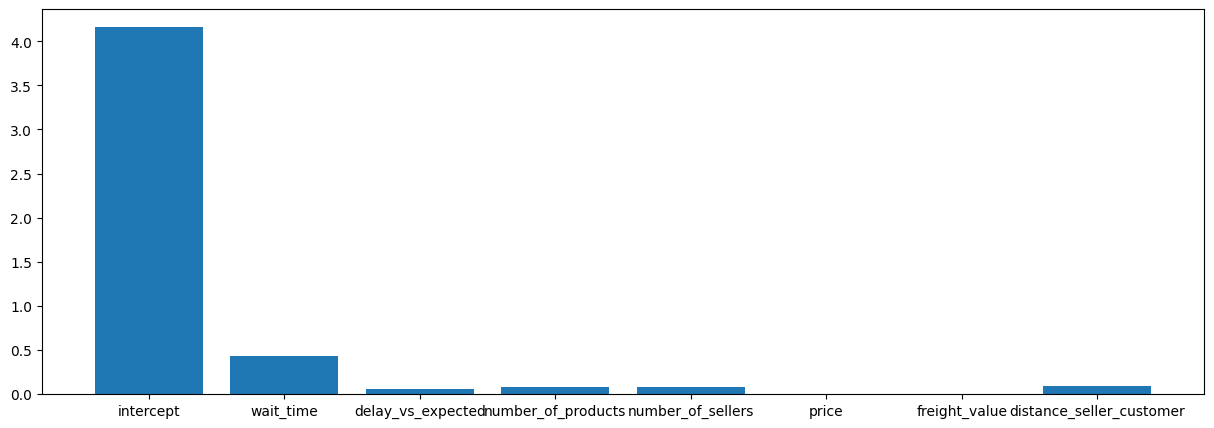

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))

listmodel = ['intercept','wait_time', 'delay_vs_expected', 'number_of_products','number_of_sellers', 'price', 'freight_value', 'distance_seller_customer']
ax.bar(listmodel, model4.params.abs())


## 3 - Check model performance

In [12]:
residual_mean = model4.resid.mean()

In [13]:
import math 

MSE = np.square(model4.resid).mean()
RMSE = math.sqrt(MSE)
RMSE

1.1949435020713937

(array([0.0000e+00, 3.9800e+03, 5.4310e+03, 7.6700e+03, 1.7398e+04,
        5.2268e+04, 8.7400e+03, 2.8000e+02, 3.9000e+01, 1.9000e+01]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <BarContainer object of 10 artists>)

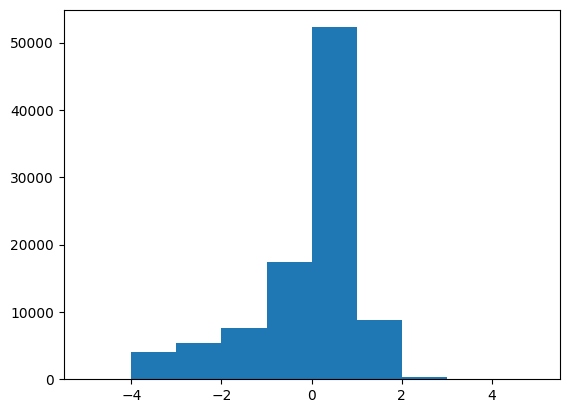

In [21]:
fig, ax = plt.subplots()
ax.hist(model4.resid, range = (-5, 5), label = 'residuals')

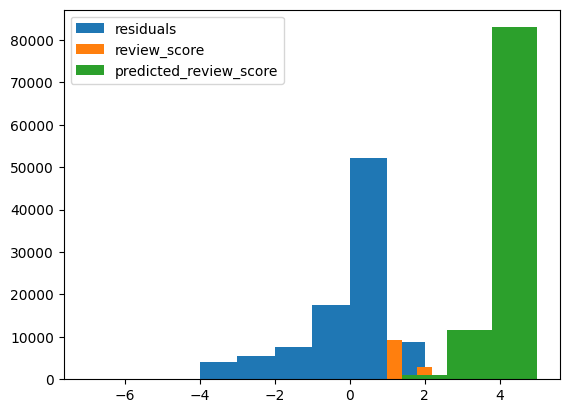

In [15]:
fig 
ax.hist(orders_standard['review_score'], label = 'review_score')
ax.hist(model4.predict(), label = 'predicted_review_score')
ax.legend()
fig

/Users/victorvoneisenhart-rothe/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delay_vs_expected', ylabel='review_score'>

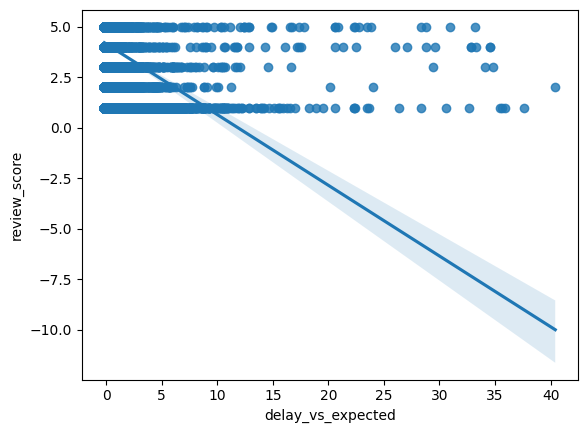

In [28]:
sns.regplot(orders_standard['delay_vs_expected'], orders_standard['review_score'])


# import statsmodels.api as sm
# fig = plt.figure(figsize=(10,6))
# fig = sm.graphics.plot_partregress_grid(model4, fig=fig)

In the end, the model is not so great, for two reasons:
- First, because we don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Second, because we are trying to fit a "linear regression" function to a discrete classification problem

Instead of working on individual orders and trying to explain their discrete `review_score` based on the `wait_time`, I will focus our analysis on the sellers' level, aggregating the orders by sellers in the next challenge.